HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

In [1]:
#importing Libraries
import numpy  as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.shape

(167, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


There is only 1 categorical column,rest all are numeric.

In [5]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There is no null values in this dataset.

In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
#exports, health, imports are given in percentage of gdpp. This features would be converted to their actual values.

data[['exports','health','imports']]=data[['exports','health','imports']].apply(lambda x : x*data["gdpp"]/100)
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


### Data Visualization

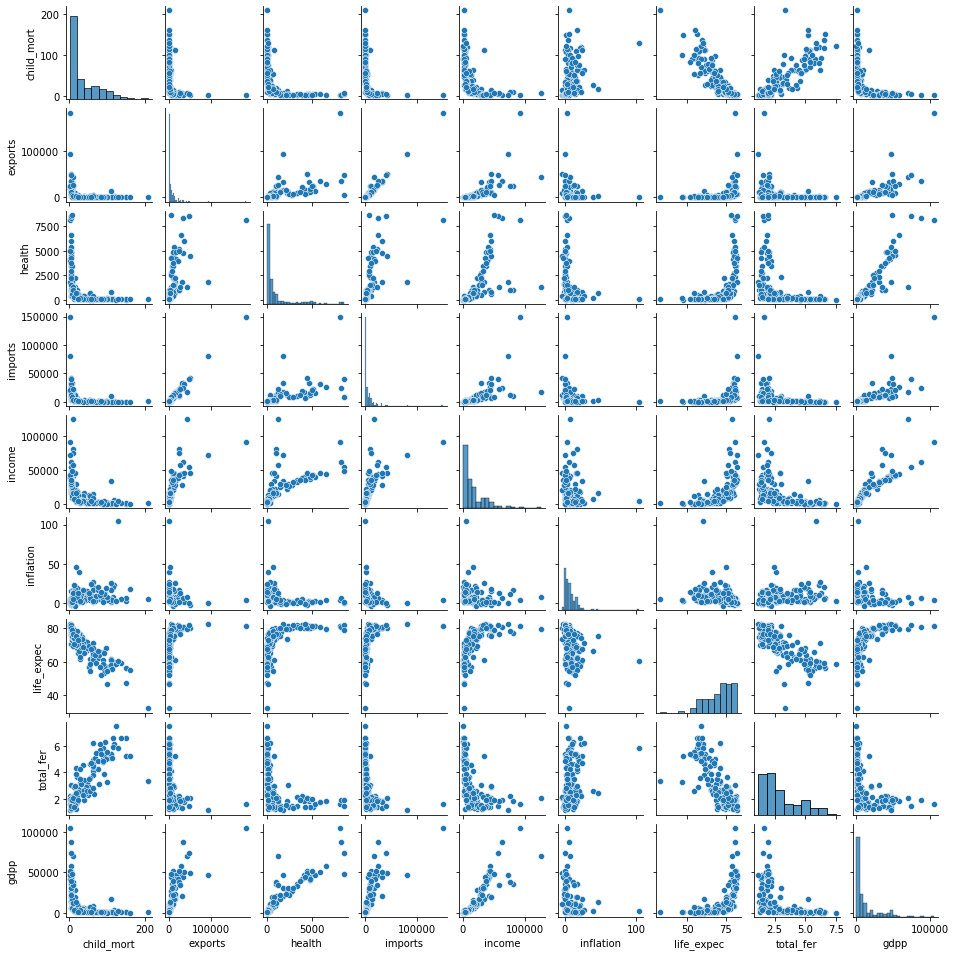

In [8]:
sns.pairplot(data,height=1.5)
plt.show()

1.Child_mort is positively correlated with total_fer and negatively correlated with life_expec.

2.gdpp is positively correlated with exports,imports and health.


<function matplotlib.pyplot.show(close=None, block=None)>

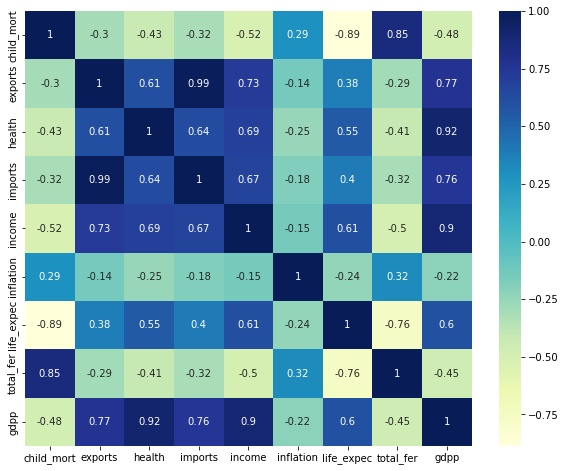

In [9]:
#finding the correlation between the features
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")
plt.show

*imports and exports have high positive correlation

*Health and gdpp also have high positive correlation

*life_expce and child_mort (correlation factor = -0.89)

*total_fer and child_mort (correlation factor = 0.85)

In [10]:
import warnings
warnings.filterwarnings('ignore')

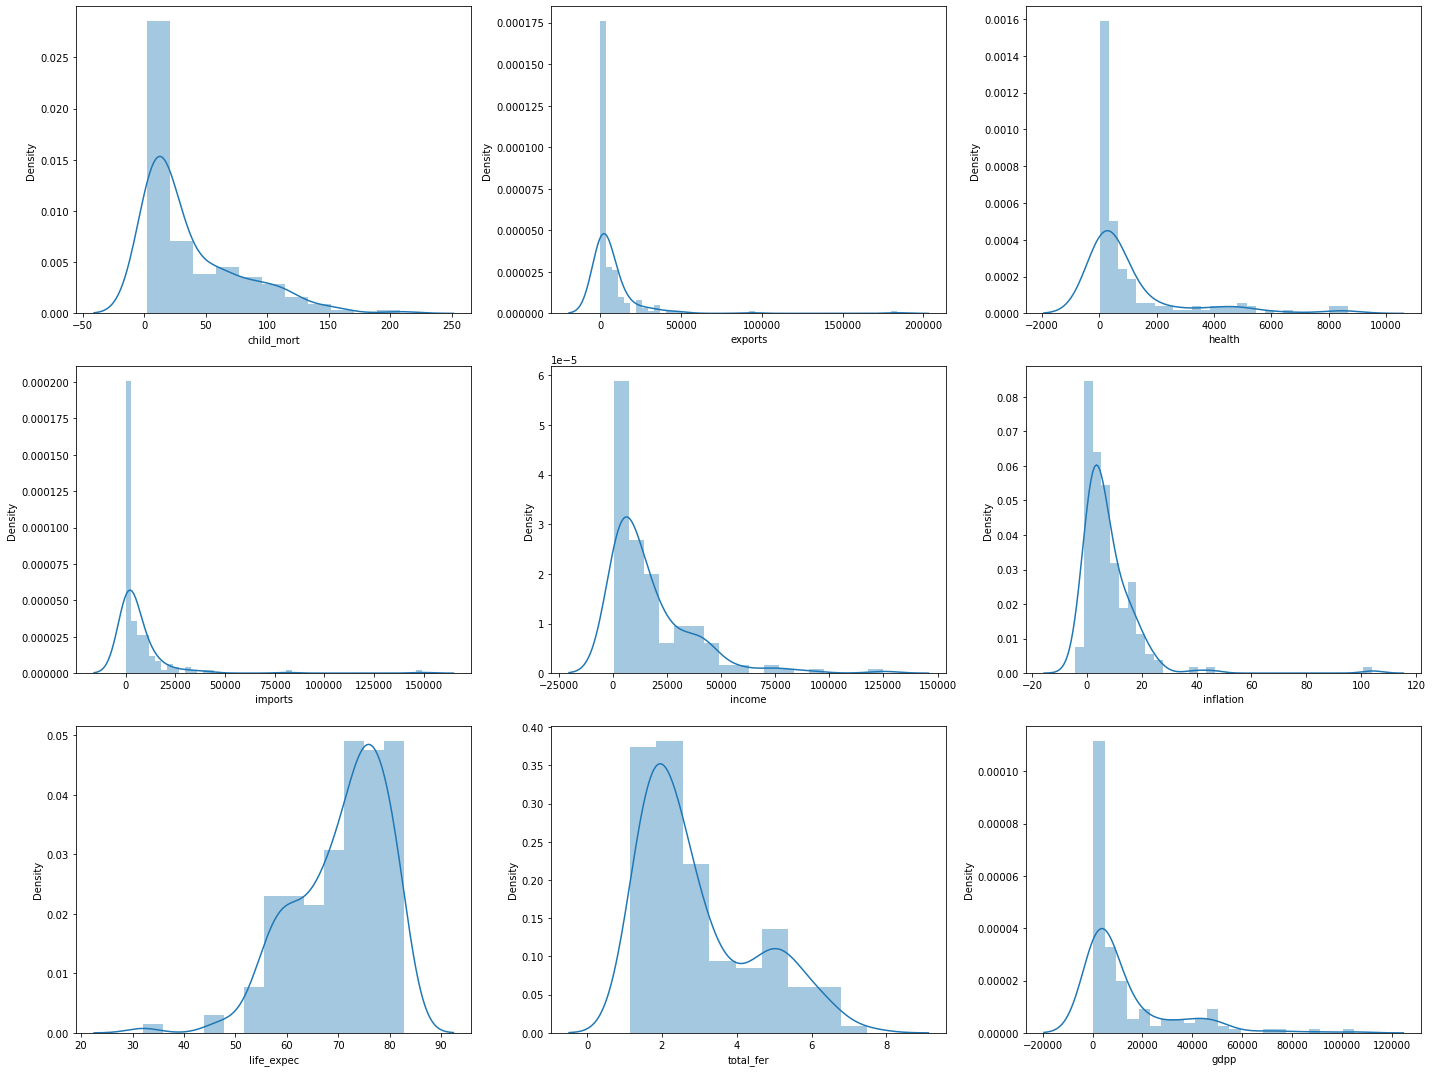

In [11]:
fig=plt.subplots(figsize=(20, 15))

for i, feature in enumerate(data.drop('country', axis=1).columns):
    plt.subplot(3, 3, i+1)
    sns.distplot(data[feature])
    plt.tight_layout()

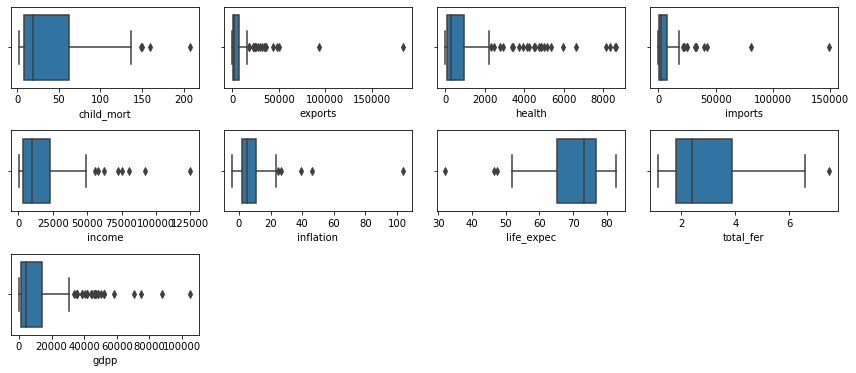

In [12]:
#Handling the outliers
fig=plt.subplots(figsize=(12, 10))
for i, feature in enumerate(data.drop('country', axis=1).columns):
    plt.subplot(6, 4, i+1)
    sns.boxplot(data[feature])
    plt.tight_layout()

For child_mort, outliers are in higher values, not capping this feature as this feature would be to used to rank the countries according their need of financial aid.

In [13]:
for i in ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']:
    Q1= np.percentile(data[i],25,interpolation='midpoint')
    Q2= np.percentile(data[i],50,interpolation='midpoint')
    Q3= np.percentile(data[i],75,interpolation='midpoint')
    IQR = Q3-Q1
    low_lim= Q1-1.5*IQR
    up_lim= Q3+1.5*IQR
    df1= data[i]>up_lim
    df2= data[i]<low_lim
    data.drop(data.loc[df1].index,inplace=True)
    data.drop(data.loc[df2].index,inplace=True)

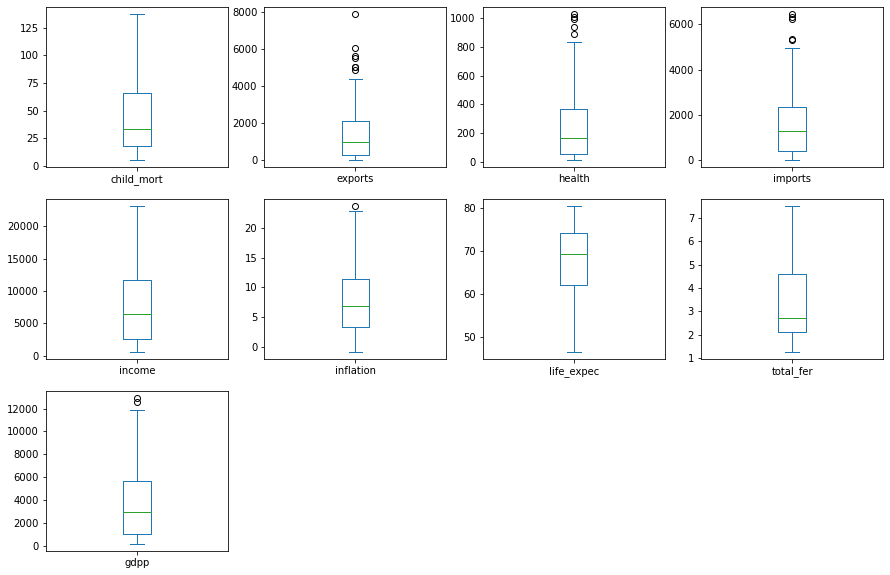

In [14]:
data.plot(kind='box',subplots=True,layout=(3,4),figsize=(15,10))
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['country']=le.fit_transform(data['country'])

In [16]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
df=scalar.fit_transform(data)
df=pd.DataFrame(df)

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.716516,1.288979,-0.911714,-0.827332,-0.934513,-1.049856,0.254067,-1.598014,1.687884,-0.997074
1,-1.685307,-0.845412,-0.209210,0.076099,0.235393,0.364316,-0.579757,1.130276,-1.084940,0.086256
2,-1.654098,-0.535113,0.156538,-0.251379,-0.159610,0.869134,1.375940,1.157423,-0.260407,0.199582
3,-1.622888,2.124175,0.470148,-0.592706,-0.082984,-0.320674,2.437170,-1.068645,1.913966,-0.085263
4,-1.591679,-0.906311,0.307403,2.340516,0.006893,1.854975,2.184496,1.062408,-0.606179,1.988287


## K-Means Clustering

In [18]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

1110.0
646.4245047535933
488.9811222212594
435.164034486232
385.3649875800513
354.8588656601396
322.07780917946735
300.98695668556945
284.67695350707214
264.93169856131294


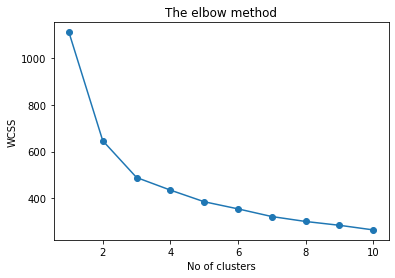

In [19]:
plt.plot(range(1,11),wcss,'-o')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('The elbow method')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3, init= 'k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(df)
y_kmeans

array([2, 1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1,
       0, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 0, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 2,
       2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2,
       0, 2, 0, 1, 1, 2, 0, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2,
       2])

In [22]:
data['y_kmeans']=y_kmeans

In [23]:
data['country'] =le.inverse_transform(data['country'])
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,y_kmeans
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,0


In [24]:
data['y_kmeans'].value_counts()

1    47
2    38
0    26
Name: y_kmeans, dtype: int64

In [25]:
cat1 = data[data['y_kmeans']==0]
cat1 =cat1.sort_values(by = 'gdpp', ascending = True)
cat1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,y_kmeans
148,Thailand,14.9,3378.20,197.104,3088.64,13500,4.08,76.6,1.55,5080,0
130,Serbia,7.6,1779.89,562.640,2591.39,12700,5.88,74.7,1.40,5410,0
14,Belarus,5.5,3099.42,338.283,3889.35,16200,15.10,70.4,1.49,6030,0
21,Botswana,52.5,2768.60,527.050,3257.55,13300,8.92,57.1,2.88,6350,0
104,Montenegro,6.8,2471.60,608.548,4188.36,14000,1.60,76.4,1.77,6680,0


In [26]:
cat1.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,y_kmeans
22,Brazil,19.8,1198.4,1009.12,1321.6,14500,8.410,74.2,1.80,11200,0
85,Latvia,7.8,6068.1,754.84,6226.3,18300,-0.812,73.1,1.36,11300,0
160,Uruguay,10.6,3129.7,993.65,3022.6,17100,4.910,76.4,2.08,11900,0
121,Poland,6.0,5052.6,939.96,5304.6,21800,1.660,76.3,1.41,12600,0
33,Chile,8.7,4863.3,1026.84,4037.7,19400,8.960,79.1,1.88,12900,0


In [27]:
cat2 = data[data['y_kmeans']==1]
cat2 =cat2.sort_values(by = 'gdpp', ascending = True)
cat2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,y_kmeans
109,Nepal,47.0,56.7136,31.0800,215.488,1990,15.10,68.3,2.61,592,1
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.14,70.4,2.33,758,1
27,Cambodia,44.4,425.2260,44.6448,467.670,2520,3.12,66.1,2.88,786,1
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790,10.00,68.5,3.10,880,1
164,Vietnam,23.3,943.2000,89.6040,1050.620,4490,12.10,73.1,1.95,1310,1


In [28]:
cat2.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,y_kmeans
45,Dominican Republic,34.4,1237.15,338.990,1814.85,11100,5.44,74.6,2.60,5450,1
9,Azerbaijan,39.2,3171.12,343.392,1208.88,16000,13.80,69.1,1.92,5840,1
141,St. Vincent and the Grenadines,20.7,1675.87,278.481,3557.33,9920,4.44,71.6,2.07,6230,1
35,Colombia,18.6,993.75,474.375,1112.50,10900,3.86,76.4,2.01,6250,1
71,Iran,19.3,1593.32,365.680,1266.82,17400,15.90,74.5,1.76,6530,1


In [29]:
cat3 = data[data['y_kmeans']==2]
cat3 =cat3.sort_values(by = 'gdpp', ascending = True)
cat3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,y_kmeans
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,2


In [30]:
cat3.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,y_kmeans
166,Zambia,83.1,540.20,85.994,451.14,3280,14.00,52.0,5.40,1460,2
142,Sudan,76.7,291.56,93.536,254.56,3370,19.60,66.3,4.88,1480,2
81,Kiribati,62.7,198.17,168.370,1190.51,1730,1.52,60.7,3.84,1490,2
38,"Congo, Rep.",63.9,2331.74,67.404,1498.78,5190,20.70,60.4,4.95,2740,2
3,Angola,119.0,2199.19,100.605,1514.37,5900,22.40,60.1,6.16,3530,2


In [31]:
countries=list(cat3.country)
countries

['Burundi',
 'Liberia',
 'Congo, Dem. Rep.',
 'Niger',
 'Madagascar',
 'Mozambique',
 'Malawi',
 'Eritrea',
 'Togo',
 'Guinea-Bissau',
 'Afghanistan',
 'Gambia',
 'Rwanda',
 'Burkina Faso',
 'Uganda',
 'Guinea',
 'Tanzania',
 'Mali',
 'Tajikistan',
 'Benin',
 'Comoros',
 'Kenya',
 'Myanmar',
 'Senegal',
 'Pakistan',
 'Lao',
 'Lesotho',
 'Mauritania',
 "Cote d'Ivoire",
 'Solomon Islands',
 'Yemen',
 'Ghana',
 'Cameroon',
 'Zambia',
 'Sudan',
 'Kiribati',
 'Congo, Rep.',
 'Angola']

Countries in cat3 needs financial aid.These countries have low gdpp,high child mortality rate and low life expectancy.